In [98]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot')
%matplotlib inline
import sklearn.model_selection 
import sklearn.linear_model
import sklearn.metrics 


In [92]:
# clean up the data while loading, set a names for every data, seperate them using a whitespace(regex) and use the name pass to the name args in the array
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", delimiter=r"\s+", names = ["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])

In [21]:
# print the first 5 rows of data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
#show the shape of data in (rows, columns)
df.shape


(505, 1)

In [28]:

#check if any null value exist in the dataframe
df[pd.isnull(df).any(axis=1)]

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [29]:
# seperate dataframe into dependent and independent variables
X = df[["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]]
Y = df["MEDV"]

In [30]:
type(X)

pandas.core.frame.DataFrame

In [37]:
X.shape

(506, 13)

In [35]:
type(Y)

pandas.core.series.Series

In [34]:
Y.shape

(506,)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [45]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
33,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16
418,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31


In [46]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307.0,17.4,387.38,3.13
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58


In [47]:
y_train.head()

33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
Name: MEDV, dtype: float64

In [48]:
y_test.head()

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: MEDV, dtype: float64

In [50]:
reg = linear_model.LinearRegression()

In [51]:
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
reg.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [53]:
reg.intercept_

37.912487009750045

In [63]:
y_pred = reg.predict(x_test)

In [64]:
y_test_m = y_test.as_matrix()

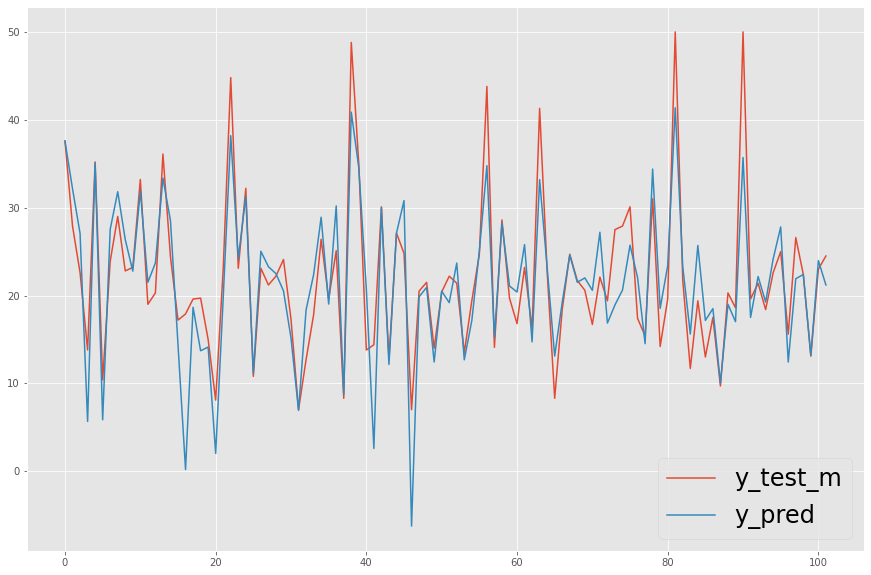

In [74]:
plt.figure(figsize=(15,10))
plt.plot(y_test_m,ms=50,alpha=1)
plt.plot(y_pred,ms=50,alpha=1)
legend_list = ['y_test_m','y_pred']
plt.legend(legend_list, loc=4, fontsize="24")

In [78]:
mean_squared_error(y_test, y_pred)

20.869292183770778

In [79]:
r2_score(y_test, y_pred)

0.733449214745308